In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('fake_job_postings_transformed.csv')
data = data.drop('Unnamed: 0', axis = 1)
data

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_department,...,City_wilmington,City_woodbridge,City_woodruff,City_worcester,City_İstanbul,City_Αthens,City_Αθήνα,City_ΕΛΛΗΝΙΚΟ,City_마포구 동교동,City_nan
0,0,1,0,Other,Internship,NaN,NaN,Marketing,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17877,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17878,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
target = 'fraudulent'


In [5]:
data.describe().transpose().head(20)

,count,mean,std,min,25%,50%,75%,max
telecommuting,17880.0,0.042897,0.202631,0.0,0.0,0.0,0.0,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.0,1.0,1.0,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.0,0.0,1.0,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.0,0.0,0.0,1.0
has_department,17880.0,0.354195,0.478282,0.0,0.0,0.0,1.0,1.0
has_company_profile,17880.0,0.814989,0.388317,0.0,1.0,1.0,1.0,1.0
has_description,17880.0,0.999944,0.007479,0.0,1.0,1.0,1.0,1.0
has_requirements,17880.0,0.849273,0.357793,0.0,1.0,1.0,1.0,1.0
has_benefits,17880.0,0.596756,0.490563,0.0,0.0,1.0,1.0,1.0
mulitple_locations,17880.0,0.004083,0.063768,0.0,0.0,0.0,0.0,1.0


In [6]:

plt.show()

In [7]:
list(data.columns)

['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent',
 'has_department',
 'has_company_profile',
 'has_description',
 'has_requirements',
 'has_benefits',
 'Country',
 'State',
 'City',
 'State_',
 'City_',
 'industry_',
 'mulitple_locations',
 'employment_type_Contract',
 'employment_type_Full-time',
 'employment_type_Other',
 'employment_type_Part-time',
 'employment_type_Temporary',
 'employment_type_nan',
 'required_experience_Associate',
 'required_experience_Director',
 'required_experience_Entry level',
 'required_experience_Executive',
 'required_experience_Internship',
 'required_experience_Mid-Senior level',
 'required_experience_Not Applicable',
 'required_experience_nan',
 'required_education_Associate Degree',
 "required_education_Bachelor's Degree",
 'required_education_Certification',
 'required_education_Doctorate',
 'required_education_High School or equivalen

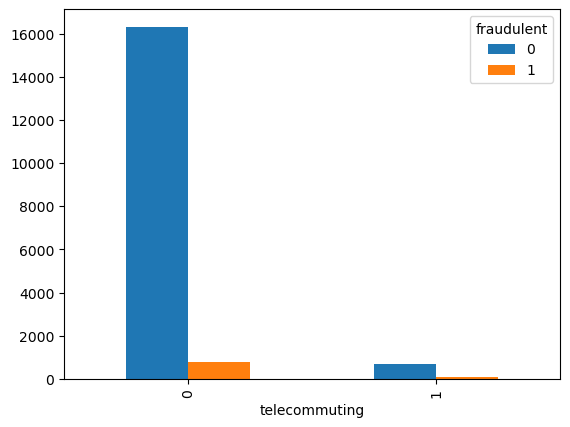

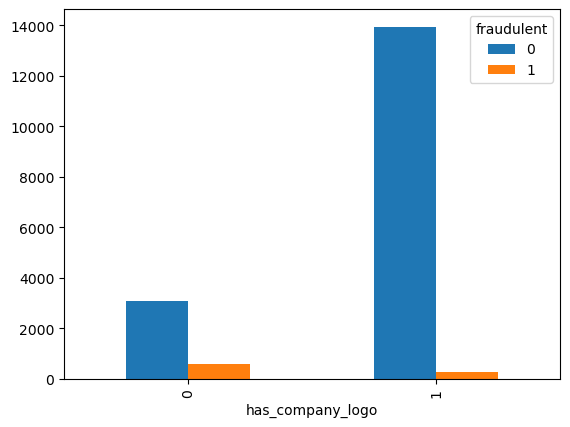

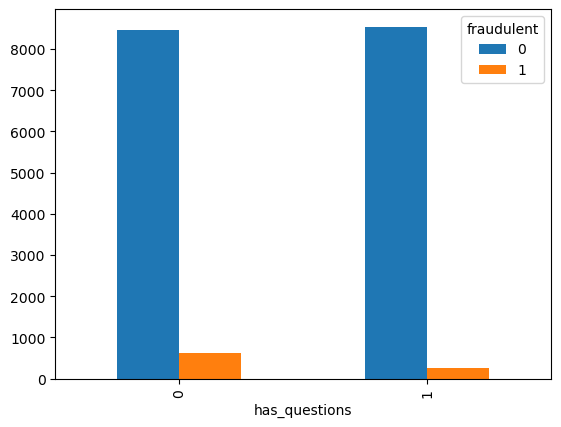

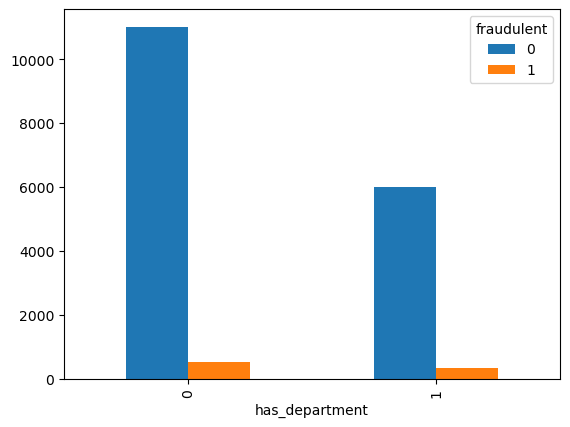

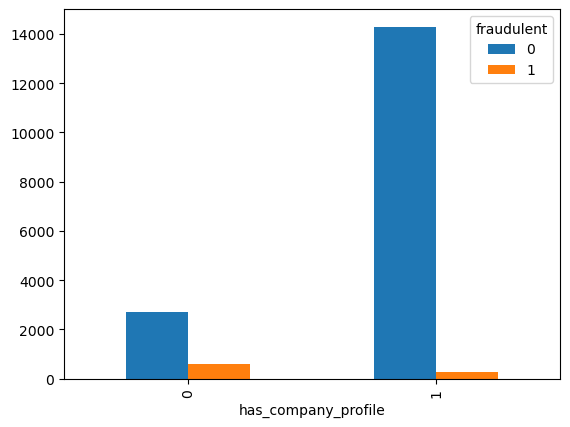

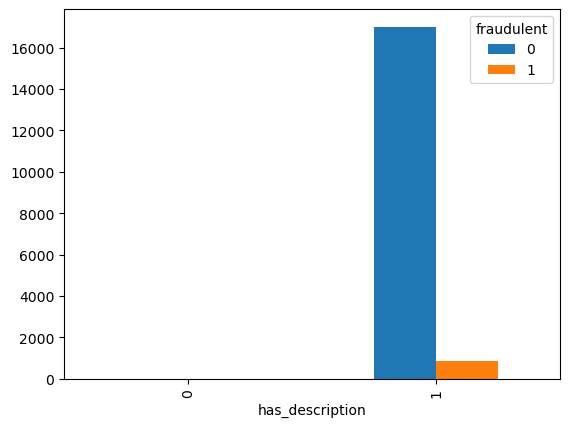

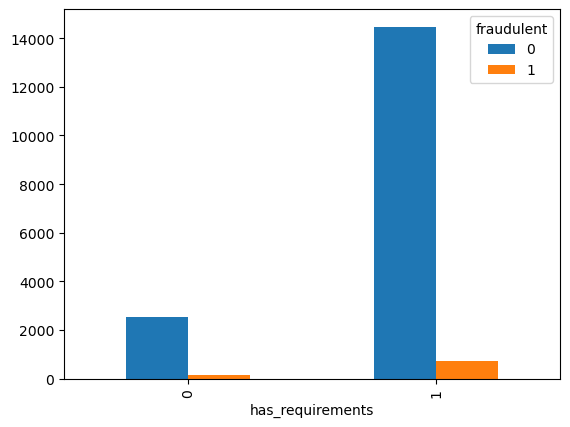

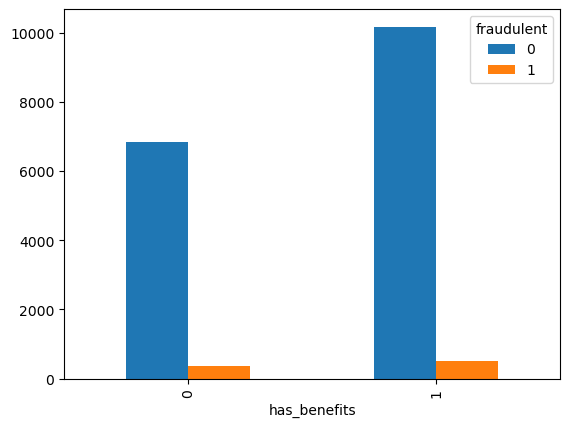

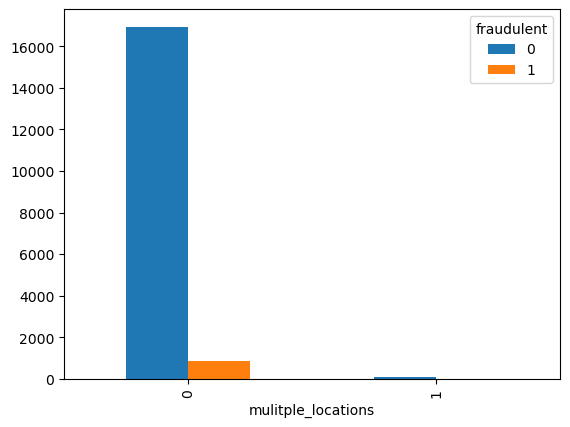

In [8]:
binary = ['telecommuting', 'has_company_logo', 'has_questions',
        'has_department', 'has_company_profile',
       'has_description', 'has_requirements', 'has_benefits', 'mulitple_locations']


for column in binary:
    pd.crosstab((data[column]),data['fraudulent']).plot.bar()
    plt.show()
    
#has_company_profile
#has_company_logo
#multiple locations

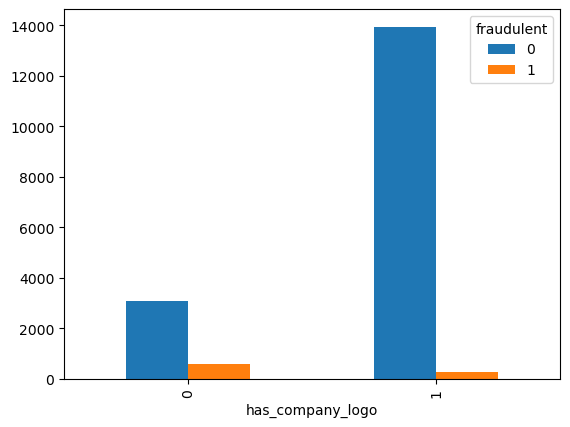

In [10]:
pd.crosstab((data['has_company_logo']),data['fraudulent']).plot.bar()
plt.show()

In [63]:
categorical = ['employment_type', 'required_experience', 'required_education', 'function']
for column in categorical:
    print(data.groupby(column).agg(mean = pd.NamedAgg('fraudulent', 'mean'), 
                                   count = pd.NamedAgg('fraudulent', 'count'),
                                   sum = pd.NamedAgg('fraudulent', 'sum')))

                     mean  count  sum
employment_type                      
Contract         0.028871   1524   44
Full-time        0.042169  11620  490
Other            0.066079    227   15
Part-time        0.092848    797   74
Temporary        0.008299    241    2
                         mean  count  sum
required_experience                      
Associate            0.018285   2297   42
Director             0.043702    389   17
Entry level          0.066370   2697  179
Executive            0.070922    141   10
Internship           0.026247    381   10
Mid-Senior level     0.029667   3809  113
Not Applicable       0.053763   1116   60
                                       mean  count  sum
required_education                                     
Associate Degree                   0.021898    274    6
Bachelor's Degree                  0.019436   5145  100
Certification                      0.111765    170   19
Doctorate                          0.038462     26    1
High School or equiv

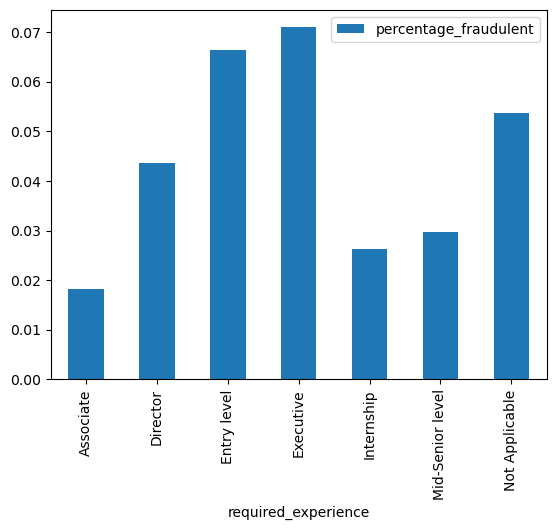

In [82]:
data.groupby('required_experience').agg(percentage_fraudulent = pd.NamedAgg('fraudulent', 'mean'), 
                                   count = pd.NamedAgg('fraudulent', 'count'),
                                   sum = pd.NamedAgg('fraudulent', 'sum')) \
.reset_index().plot.bar(x = 'required_experience', y = 'percentage_fraudulent')

plt.show()

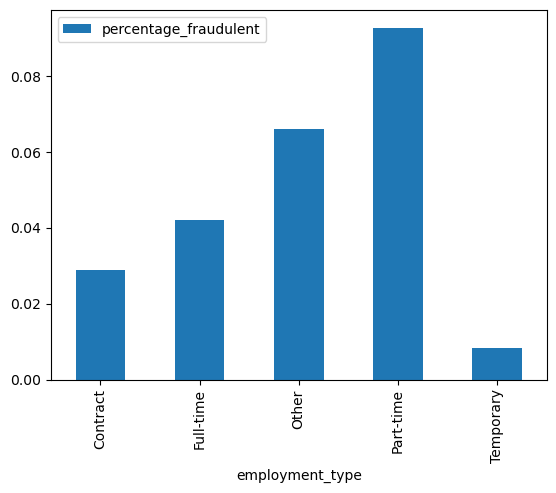

In [77]:
data.groupby('employment_type').agg(percentage_fraudulent = pd.NamedAgg('fraudulent', 'mean'), 
                                   count = pd.NamedAgg('fraudulent', 'count'),
                                   sum = pd.NamedAgg('fraudulent', 'sum')) \
.reset_index().plot.bar(x = 'employment_type', y = 'percentage_fraudulent')

plt.show()

In [88]:
data.groupby('function').agg(percentage_fraudulent = pd.NamedAgg('fraudulent', 'mean'), 
                                   num_job_listings = pd.NamedAgg('fraudulent', 'count'),
                                   num_fraudulent_job_listings = pd.NamedAgg('fraudulent', 'sum')) \
.sort_values('percentage_fraudulent', ascending = False).head(5)

,percentage_fraudulent,num_job_listings,num_fraudulent_job_listings
function,,,
Administrative,0.188889,630,119
Financial Analyst,0.151515,33,5
Accounting/Auditing,0.136792,212,29
Distribution,0.125000,24,3
Other,0.098462,325,32
